# Topic Modelling
dataseset: https://www.kaggle.com/c/spooky-author-identification

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
#import WordCloud
%matplotlib inline

In [2]:
raw_train = pd.read_csv('data/train.csv')
raw_test = pd.read_csv('data/test.csv')

In [3]:
raw_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [11]:
STOPWORDS = nltk.corpus.stopwords.words('english')
STEMMER = nltk.stem.PorterStemmer()
LEMM = nltk.stem.WordNetLemmatizer()

# Latent Dirichlet Allocation and Non-negative Matrix with sklearn

In [30]:
def preprocess_text(text):
    text = text.split(" ")
    text = [word.lower() for word in text]
    text = [nltk.word_tokenize(word)[0] for word in text]
    
    text = [word for word in text if word not in STOPWORDS]
    text = [STEMMER.stem(word) for word in text]
    text = [LEMM.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

def vectorize_data(data):
    vectorizer = CountVectorizer(min_df=0)
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    return vectors, feature_names

In [31]:
text_data = []
train = raw_train['text']
for sentence in train:
    sentence = preprocess_text(sentence)
    text_data.append(sentence)
    
vector_data, feature_names = vectorize_data(text_data)

In [32]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [33]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(vector_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [34]:
nmf = NMF(n_components=11, random_state=1,
          alpha=.1, l1_ratio=.5)
nmf.fit(vector_data)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=11, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [35]:
n_top_words = 40

print("\nTopics in LDA model: ")
print_top_words(lda, feature_names, n_top_words)

print("\nTopics in NMF model: ")
print_top_words(nmf, feature_names, n_top_words)


Topics in LDA model: 

Topic #0:thing must said ever say much know world tell young age good one month see may inde everi sure lead enough mani week repli fellow realli visibl keep astonish great imag think excel art societi resembl labour two gener would

Topic #1:two one hope heard mani never new happi day side hour pas earth year upon good away best state mr gone came among love except far save cottag intens obtain found ship sir london wave leav water soon spring till

Topic #2:thought life love would death one heart fear yet feel friend eye everi man let might even remain place voic seem day mind express though someth spirit well like raymond high chang felt father die soul call look beauti perdita

Topic #3:live god togeth ye attempt content got beauti futur el folk be place surround kind island poet occasion gold em pursuit sharp aout guard fish bit entertain pardon start claim nobodi depriv heh franc war beg think placid harbour noth

Topic #4:upon could first one would word a

## visualization using word cloud

In [36]:
import wordcloud

In [37]:
first_topic = lda.components_[0]
first_topic_words = [feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]

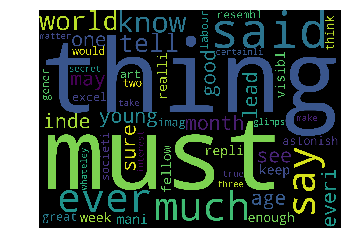

In [38]:
firstcloud = wordcloud.WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

# Using gensim

In [9]:
import gensim
from gensim import corpora

In [13]:
def preprocess_text(text):
    text = text.split(" ")
    text = [word.lower() for word in text]
    text = [nltk.word_tokenize(word)[0] for word in text]
    
    text = [word for word in text if word not in STOPWORDS]
    text = [STEMMER.stem(word) for word in text]
    text = [LEMM.lemmatize(word) for word in text]
    return text

In [15]:
text_data = []
train = raw_train['text']
for sentence in train:
    sentence = preprocess_text(sentence)
    text_data.append(sentence)

In [16]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [18]:
NUM_TOPICS = 5
lda = gensim.models.ldamodel.LdaModel(corpus, 
                                      num_topics=NUM_TOPICS, 
                                      id2word=dictionary, 
                                      passes=15)

In [20]:
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.043*"``" + 0.011*"said" + 0.009*"one" + 0.007*"could"')
(1, '0.010*"love" + 0.008*"life" + 0.007*"heart" + 0.007*"would"')
(2, '0.007*"year" + 0.007*"old" + 0.006*"one" + 0.006*"like"')
(3, '0.006*"one" + 0.006*"open" + 0.006*"hous" + 0.006*"light"')
(4, '0.011*"upon" + 0.007*"time" + 0.006*"could" + 0.005*"would"')


## visualization using pyLDAvis

In [21]:
import pyLDAvis.gensim

In [22]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/home/dong/anaconda3/envs/nlp/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))
